In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import mannwhitneyu, pearsonr

/Users/khaled/anaconda3/lib/python3.11/site-packages/pandas/core/arrays/masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv("/Users/khaled/Desktop/Python Ideas/WebScrapping/Archive/HF_dataset_5_30_cleaned.csv")

In [131]:
df['spaces'][0]

"['Gladiator/Text-Summarizer', 'ccolas/TastyPiano', 'IDEA-CCNL/Erlangshen-UniMC-Zero-Shot', 'docs-demos/albert-base-v2', 'piecurus/Summarizer', 'altafalam3/Text-Summarizer', 'jeang/ernie_demo_toy', 'prithivMLmods/Bart-Cnn', 'dragonSwing/capu-demo', 'svasthaintelligence/MeSHClassify', 'adamtayzzz/test', 'cagataydag/TSmarizer', 'mygyasir/Text-Summarizer', 'Anavya1/Anavya-TEXTSUMMARIZERADVANCE']"

In [126]:
df.head()

,id,private,downloads,likes,tags,pipeline_tag,library_name,siblings,transformers_info,spaces,safetensors,commit_details,total_commits,earliest_commit_date,fulfill_tasks,tasks,dataset,location,license,paper,language,Group,Tag Group,year,quarter,year_quarter
0,albert/albert-base-v1,False,21769,7.0,"transformers, pytorch, tf, safetensors, albert...",fill-mask,transformers,"[RepoFile: {'blob_id': None, 'lfs': None, 'rfi...",NaN,"['Gladiator/Text-Summarizer', 'ccolas/TastyPia...","{'parameters': {'F32': 11842272}, 'total': 118...",[{'Commit ID': '082438ba120d36b97b9288772a4114...,15.0,2019-12-20 13:28:51+00:00,yes,fill-mask,"bookcorpus, wikipedia",us,apache-2.0,arxiv:1909.11942,English,Text Processing,Text Processing,2019,4,2019 Q4
1,albert/albert-base-v2,False,2463274,90.0,"transformers, pytorch, tf, jax, rust, safetens...",fill-mask,transformers,"[RepoFile: {'blob_id': None, 'lfs': None, 'rfi...",NaN,"['society-ethics/model-card-regulatory-check',...","{'parameters': {'F32': 11842272}, 'total': 118...",[{'Commit ID': '8e2f239c5f8a2c0f253781ca60135d...,22.0,2019-11-04 17:00:52+00:00,yes,fill-mask,"bookcorpus, wikipedia",us,apache-2.0,arxiv:1909.11942,English,Text Processing,Text Processing,2019,4,2019 Q4
2,albert/albert-large-v1,False,2130,3.0,"transformers, pytorch, tf, albert, fill-mask, ...",fill-mask,transformers,"[RepoFile: {'blob_id': None, 'lfs': None, 'rfi...",NaN,"['Gladiator/Text-Summarizer', 'ccolas/TastyPia...",NaN,[{'Commit ID': '94fd741fb5d6cb5bc578fc15483701...,16.0,2019-12-20 13:28:51+00:00,yes,fill-mask,"bookcorpus, wikipedia",us,apache-2.0,arxiv:1909.11942,English,Text Processing,Text Processing,2019,4,2019 Q4
3,albert/albert-large-v2,False,86617,14.0,"transformers, pytorch, tf, safetensors, albert...",fill-mask,transformers,"[RepoFile: {'blob_id': None, 'lfs': None, 'rfi...",NaN,"['ccolas/TastyPiano', 'IDEA-CCNL/Erlangshen-Un...","{'parameters': {'F32': 17875424}, 'total': 178...",[{'Commit ID': 'dfed3a5ef4499fb3351c4ebbcf4873...,16.0,2019-11-04 17:00:53+00:00,yes,fill-mask,"bookcorpus, wikipedia",us,apache-2.0,arxiv:1909.11942,English,Text Processing,Text Processing,2019,4,2019 Q4
4,albert/albert-xlarge-v1,False,1553,4.0,"transformers, pytorch, tf, safetensors, albert...",fill-mask,transformers,"[RepoFile: {'blob_id': None, 'lfs': None, 'rfi...",NaN,"['ccolas/TastyPiano', 'IDEA-CCNL/Erlangshen-Un...","{'parameters': {'F32': 59047392}, 'total': 590...",[{'Commit ID': 'ed6f87d14403b3c459a458fa6aa9dc...,15.0,2019-12-20 13:28:51+00:00,yes,fill-mask,"bookcorpus, wikipedia",us,apache-2.0,arxiv:1909.11942,English,Text Processing,Text Processing,2019,4,2019 Q4


In [30]:
df = df.drop_duplicates(subset='id', keep='first')

In [117]:
import pandas as pd

# Split the 'languages' string on commas, then explode the DataFrame to create a new row for each language in the list
exploded_languages = df['language'].str.split(', ').explode()

# Now count the occurrences of each language
language_counts = exploded_languages.value_counts()

# Display the counts
print(language_counts[2:11])


language
French        3863
German        3304
Spanish       3094
Japanese      2738
Korean        2582
Russian       2173
Italian       1994
Portuguese    1813
Arabic        1568
Name: count, dtype: int64


### Model Tags 

In [96]:
tag_groups = {
    'Text Processing': [
        'text-generation', 'text-classification', 'token-classification', 'text2text-generation', 
        'fill-mask', 'summarization', 'question-answering', 'translation', 'text-to-audio', 
        'text-to-speech', 'text-to-video', 'table-to-text', 'text-retrieval', 'sentence-similarity',
        'text-to-3d', 'text-to-image'
    ],
    'Audio Processing': [
        'audio-to-audio', 'automatic-speech-recognition', 'voice-activity-detection',
        'audio-classification'
    ],
    'Image Processing': [
        'image-classification', 'image-to-text', 'image-segmentation', 'image-to-image', 
        'zero-shot-image-classification', 'image-feature-extraction', 'image-text-to-text', 
        'image-to-3d', 'unconditional-image-generation', 'depth-estimation'
    ],
    'Video Processing': [
        'video-classification', 'image-to-video'
    ],
    'Multimodal Processing': [
        'visual-question-answering', 'document-question-answering'
    ],
    'Data Analysis & Classification': [
        'feature-extraction', 'object-detection', 'tabular-classification', 'tabular-regression', 
        'zero-shot-classification', 'zero-shot-object-detection', 'graph-ml', 'mask-generation',
        'time-series-forecasting', 'reinforcement-learning'
    ],
    'Specialized Applications': [
        'multiple-choice', 'table-question-answering', 'robotics'
    ],
    'Other': [
        'other'
    ],
    'Unknown': [
        'Unknown'
    ]
}

# Check for overlaps in tag groups
def check_overlap(tag_groups):
    all_tags = []
    overlaps = {}
    for group, tags in tag_groups.items():
        for tag in tags:
            if tag in all_tags:
                if tag in overlaps:
                    overlaps[tag].append(group)
                else:
                    overlaps[tag] = [group]
            else:
                all_tags.append(tag)
    return overlaps

# Execute the function to find overlaps
overlaps = check_overlap(tag_groups)

if not overlaps:
    print("No overlaps found. Each task is uniquely categorized.")
else:
    print("Overlaps found in the following tasks across categories:")
    for task, groups in overlaps.items():
        print(f"Task: {task}, Categories: {groups}")



No overlaps found. Each task is uniquely categorized.


### Model Stats 

Combined Task and Zero Interaction Statistics:
                             Group                    pipeline_tag  num_models  Percentage  models_with_likes  models_with_downloads  percentage_zero_likes  percentage_zero_downloads
0                 Audio Processing            audio-classification        2236    0.281388              210.0                 2173.0              90.608229                   2.817531
1                 Audio Processing                  audio-to-audio        3748    0.471665              296.0                 3272.0              92.102455                  12.700107
2                 Audio Processing    automatic-speech-recognition       16611    2.090404             1685.0                15493.0              89.856119                   6.730480
3                 Audio Processing        voice-activity-detection          25    0.003146               10.0                   14.0              60.000000                  44.000000
4   Data Analysis & Classification    

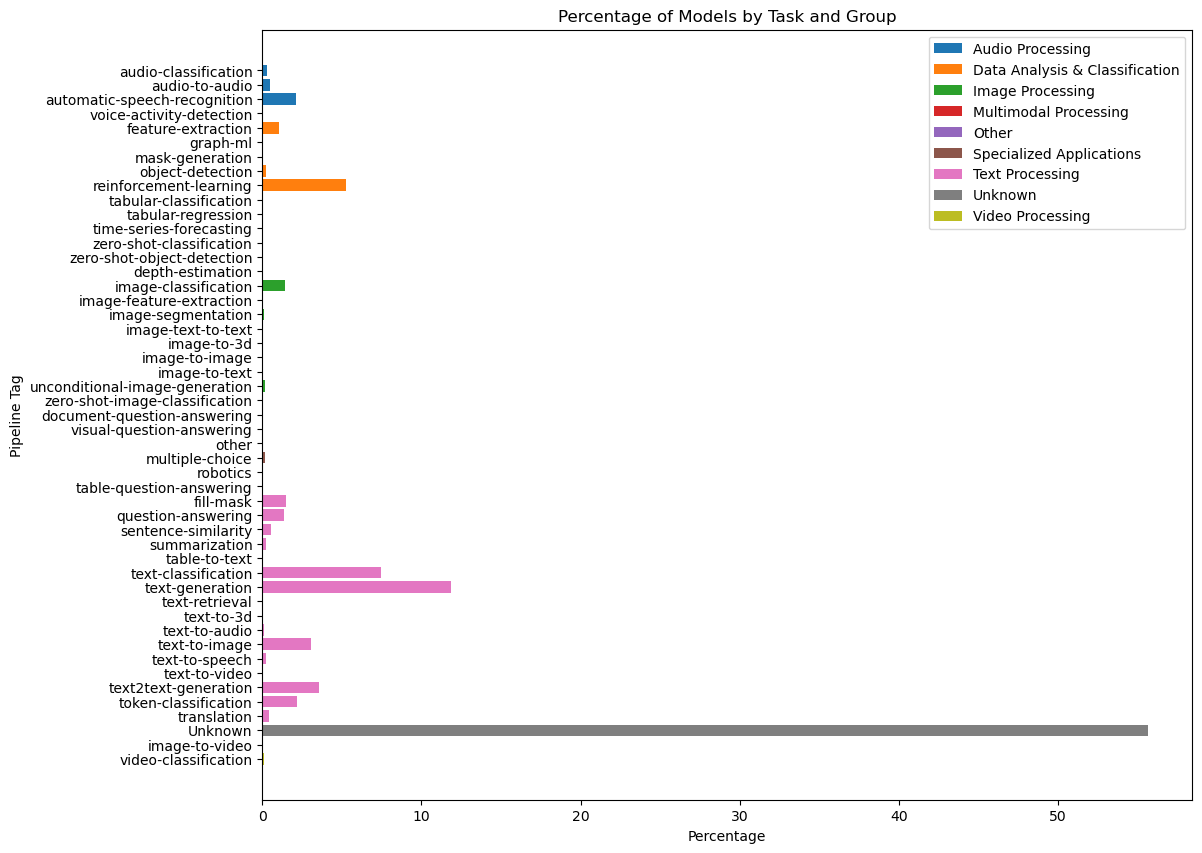

In [35]:
import pandas as pd
import matplotlib.pyplot as plt

# Assuming df is defined and loaded with necessary columns 'likes' and 'downloads'

# Define your tag_groups dictionary (assuming it is already defined and includes all necessary tags)

# Create a reverse mapping from tag_groups for easier lookup
tag_to_group = {tag: group for group, tags in tag_groups.items() for tag in tags}

# Map each pipeline tag to its group
df['Group'] = df['pipeline_tag'].map(tag_to_group).fillna('Unknown')

# Fill missing pipeline tags with 'Unknown'
df['pipeline_tag'] = df['pipeline_tag'].fillna('Unknown')

# Calculate total number of models
total_models = len(df)

# Calculate number of models per task and percentage
task_counts = df.groupby(['Group', 'pipeline_tag']).size().reset_index(name='num_models')
task_counts['Percentage'] = (task_counts['num_models'] / total_models) * 100

# Calculate number of models with 0 likes and 0 downloads per pipeline_tag
zero_likes = df[df['likes'] == 0].groupby(['Group', 'pipeline_tag']).size().reset_index(name='zero_likes_count')
zero_downloads = df[df['downloads'] == 0].groupby(['Group', 'pipeline_tag']).size().reset_index(name='zero_downloads_count')

# Merge zero counts with task counts
stats = task_counts.merge(zero_likes, on=['Group', 'pipeline_tag'], how='left').fillna(0)
stats = stats.merge(zero_downloads, on=['Group', 'pipeline_tag'], how='left').fillna(0)

# Calculate number of models with at least one like or one download
stats['models_with_likes'] = stats['num_models'] - stats['zero_likes_count']
stats['models_with_downloads'] = stats['num_models'] - stats['zero_downloads_count']

# Calculate percentages of zero likes and downloads
stats['percentage_zero_likes'] = (stats['zero_likes_count'] / stats['num_models']) * 100
stats['percentage_zero_downloads'] = (stats['zero_downloads_count'] / stats['num_models']) * 100

# Print the combined DataFrame stats
print("Combined Task and Zero Interaction Statistics:")
print(stats[['Group', 'pipeline_tag', 'num_models', 'Percentage', 'models_with_likes', 'models_with_downloads', 'percentage_zero_likes', 'percentage_zero_downloads']])

# Export DataFrame to Excel
stats.to_excel('/Users/khaled/Desktop/Python Ideas/WebScrapping/HuggingFace/with_otherHF_combined_stats.xlsx', index=False)

# Plotting Hugging Face Models by task and group
plt.figure(figsize=(12, 10))
for group, data in stats.groupby('Group'):
    plt.barh(data['pipeline_tag'], data['Percentage'], label=f'{group}')
plt.xlabel('Percentage')
plt.ylabel('Pipeline Tag')
plt.title('Percentage of Models by Task and Group')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest percentage on top
plt.legend()
plt.show()


### Do it by Groups

In [37]:
import pandas as pd

# Reverse the tag_groups to create a tag to group mapping
tag_to_group = {tag: group for group, tags in tag_groups.items() for tag in tags}

# Map each pipeline tag to its group
df['Group'] = df['pipeline_tag'].map(tag_to_group).fillna('Unknown')

# Group data by 'Group' and calculate necessary statistics
group_stats = df.groupby('Group').agg(
    num_models=('pipeline_tag', 'size'),
    models_with_likes=('likes', lambda x: (x > 0).sum()),
    models_with_downloads=('downloads', lambda x: (x > 0).sum()),
    zero_likes_count=('likes', lambda x: (x == 0).sum()),
    zero_downloads_count=('downloads', lambda x: (x == 0).sum())
)

# Calculate percentages
total_models = df.shape[0]
group_stats['percentage'] = (group_stats['num_models'] / total_models) * 100
group_stats['percentage_with_likes'] = (group_stats['models_with_likes'] / group_stats['num_models']) * 100
group_stats['percentage_with_downloads'] = (group_stats['models_with_downloads'] / group_stats['num_models']) * 100
group_stats['percentage_zero_likes'] = (group_stats['zero_likes_count'] / group_stats['num_models']) * 100
group_stats['percentage_zero_downloads'] = (group_stats['zero_downloads_count'] / group_stats['num_models']) * 100

# Display the statistics
print(group_stats)

# Optionally, export to Excel
group_stats.to_excel('/Users/khaled/Desktop/Python Ideas/WebScrapping/HuggingFace/groupStats.xlsx', index=True)


                                num_models  models_with_likes  models_with_downloads  zero_likes_count  zero_downloads_count  percentage  percentage_with_likes  percentage_with_downloads  percentage_zero_likes  percentage_zero_downloads
Group                                                                                                                                                                                                                                       
Audio Processing                     22620               2201                  20952             20419                  1668    2.846604               9.730327                  92.625995              90.269673                   7.374005
Data Analysis & Classification       53075               1851                  31137             51224                 21938    6.679201               3.487518                  58.666039              96.512482                  41.333961
Image Processing                     15028          

### Analysis 1 

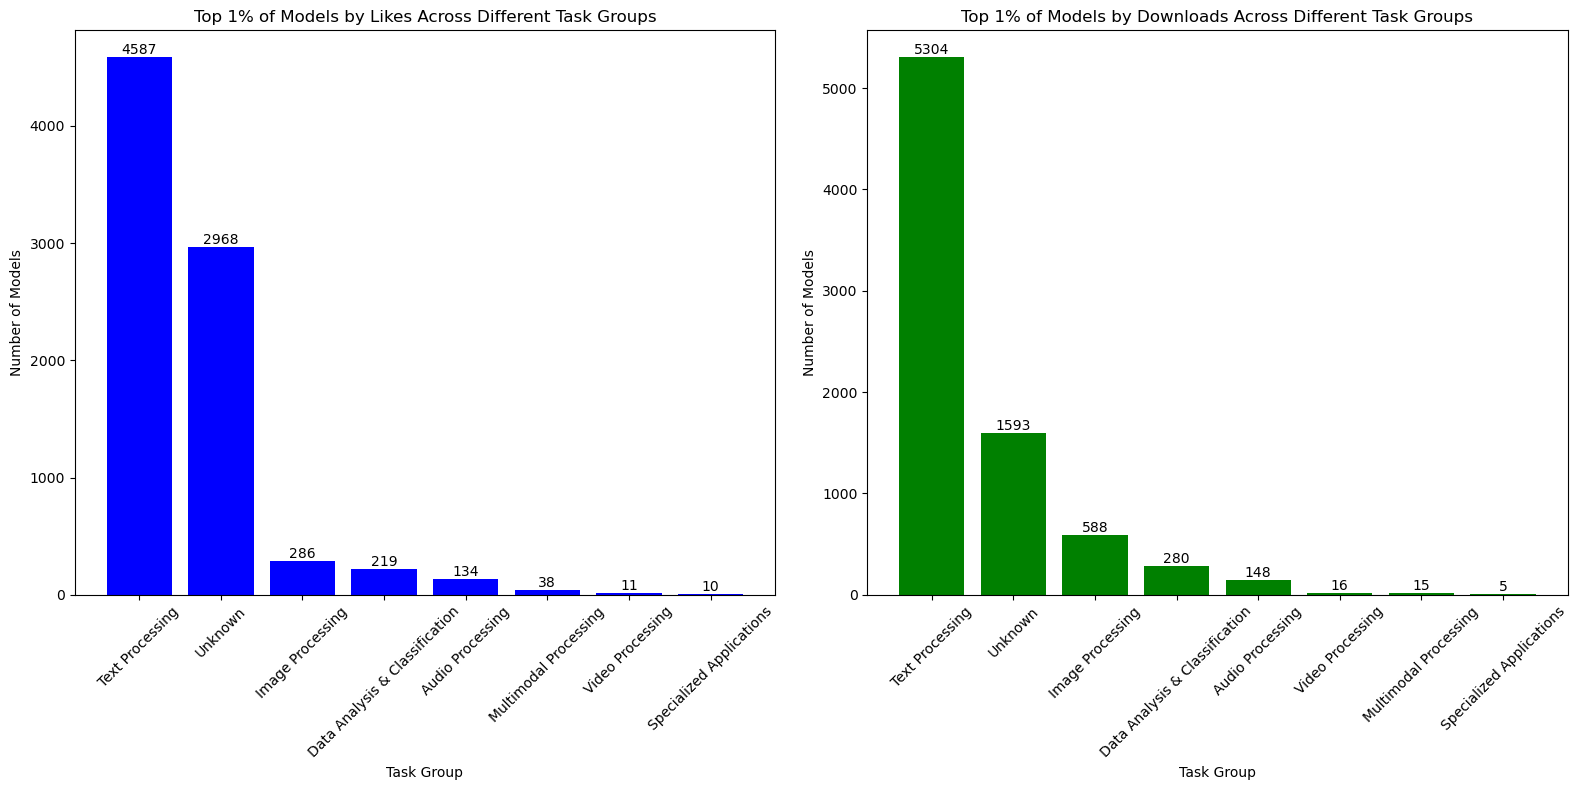

Tag Group Distribution in the Top 1% based on Likes:
Tag Group
Text Processing                   4587
Unknown                           2968
Image Processing                   286
Data Analysis & Classification     219
Audio Processing                   134
Multimodal Processing               38
Video Processing                    11
Specialized Applications            10
Name: count, dtype: int64

Tag Group Distribution in the Top 1% based on Downloads:
Tag Group
Text Processing                   5304
Unknown                           1593
Image Processing                   588
Data Analysis & Classification     280
Audio Processing                   148
Video Processing                    16
Multimodal Processing               15
Specialized Applications             5
Name: count, dtype: int64


In [40]:
import pandas as pd
import matplotlib.pyplot as plt

# Sample DataFrame definition
# Assuming df has the columns: 'pipeline_tag', 'likes', 'downloads'

# Define your tag_groups dictionary (assuming it is already defined and includes all necessary tags)

# Create a reverse mapping from tag_groups for easier lookup
tag_to_group = {tag: group for group, tags in tag_groups.items() for tag in tags}

# Function to map tags to groups
def map_tag_to_group(tag):
    return tag_to_group.get(tag, 'Unknown')

# Add a new column to the dataframe that shows the group for each model
df['Tag Group'] = df['pipeline_tag'].apply(map_tag_to_group)

# Calculate the cutoff for the top 1% of likes and downloads
top_1_percent_cutoff_likes = df['likes'].quantile(0.99)
top_1_percent_cutoff_downloads = df['downloads'].quantile(0.99)

# Filter the DataFrame to include only the top 1% based on likes and downloads
top_1_percent_models_likes = df[df['likes'] >= top_1_percent_cutoff_likes]
top_1_percent_models_downloads = df[df['downloads'] >= top_1_percent_cutoff_downloads]

# Count the occurrence of each tag group in the top 1% group for likes and downloads
group_counts_likes = top_1_percent_models_likes['Tag Group'].value_counts()
group_counts_downloads = top_1_percent_models_downloads['Tag Group'].value_counts()

# Plotting
fig, axs = plt.subplots(1, 2, figsize=(16, 8))  # 1 row, 2 columns for side-by-side plots

# Plot for likes
axs[0].bar(group_counts_likes.index, group_counts_likes.values, color='blue')
axs[0].set_title('Top 1% of Models by Likes Across Different Task Groups')
axs[0].set_xlabel('Task Group')
axs[0].set_ylabel('Number of Models')
axs[0].tick_params(axis='x', rotation=45)

# Plot for downloads
axs[1].bar(group_counts_downloads.index, group_counts_downloads.values, color='green')
axs[1].set_title('Top 1% of Models by Downloads Across Different Task Groups')
axs[1].set_xlabel('Task Group')
axs[1].set_ylabel('Number of Models')
axs[1].tick_params(axis='x', rotation=45)

# Adding text labels for counts on both plots
for ax in axs:
    bars = ax.patches
    for bar in bars:
        yval = bar.get_height()
        ax.text(bar.get_x() + bar.get_width() / 2, yval, int(yval), va='bottom', ha='center')

plt.tight_layout()
plt.show()

# Print the tag group distributions for likes and downloads
print("Tag Group Distribution in the Top 1% based on Likes:")
print(group_counts_likes)
print("\nTag Group Distribution in the Top 1% based on Downloads:")
print(group_counts_downloads)


#### Detailed breakdown

In [67]:
import pandas as pd

# Define your tag_groups dictionary (assuming it is already defined and includes all necessary tags)

# Define the mapping function for tag groups
def get_tag_group(tag):
    for group_name, tags in tag_groups.items():
        if tag in tags:
            return group_name
    return "Uncategorized"  # If tag not found in the dictionary

# Assuming df is your DataFrame and 'likes' and 'downloads' are your columns of interest

# Calculate the cutoffs for the top 1% based on likes and downloads
top_1_percent_cutoff_likes = df['likes'].quantile(0.99)
top_1_percent_cutoff_downloads = df['downloads'].quantile(0.99)

# Filter the DataFrame for the top 1% based on likes and downloads
top_1_percent_models_likes = df[df['likes'] >= top_1_percent_cutoff_likes].copy()
top_1_percent_models_downloads = df[df['downloads'] >= top_1_percent_cutoff_downloads].copy()

# Apply the tag group mapping
top_1_percent_models_likes['Tag Group'] = top_1_percent_models_likes['pipeline_tag'].apply(get_tag_group)
top_1_percent_models_downloads['Tag Group'] = top_1_percent_models_downloads['pipeline_tag'].apply(get_tag_group)

# Create and format the DataFrames for display based on likes and downloads
pipeline_tag_counts_likes = top_1_percent_models_likes['pipeline_tag'].value_counts().reset_index()
pipeline_tag_counts_likes.columns = ['Pipeline Tag', 'Model Count']
pipeline_tag_counts_likes['Tag Group'] = pipeline_tag_counts_likes['Pipeline Tag'].apply(get_tag_group)
pipeline_tag_counts_likes = pipeline_tag_counts_likes[['Tag Group', 'Pipeline Tag', 'Model Count']]

pipeline_tag_counts_downloads = top_1_percent_models_downloads['pipeline_tag'].value_counts().reset_index()
pipeline_tag_counts_downloads.columns = ['Pipeline Tag', 'Model Count']
pipeline_tag_counts_downloads['Tag Group'] = pipeline_tag_counts_downloads['Pipeline Tag'].apply(get_tag_group)
pipeline_tag_counts_downloads = pipeline_tag_counts_downloads[['Tag Group', 'Pipeline Tag', 'Model Count']]

# Print the tables
print("Model Counts within the Top 1% based on Likes:")
pipeline_tag_counts_likes
#print("\nModel Counts within the Top 1% based on Downloads:")
#pipeline_tag_counts_downloads


Model Counts within the Top 1% based on Likes:


,Tag Group,Pipeline Tag,Model Count
0,Uncategorized,Unknown,2968
1,Text Processing,text-generation,2712
2,Text Processing,text-to-image,809
3,Text Processing,text2text-generation,240
4,Text Processing,fill-mask,181
5,Text Processing,text-classification,172
6,Data Analysis & Classification,feature-extraction,142
7,Text Processing,sentence-similarity,126
8,Audio Processing,automatic-speech-recognition,97
9,Text Processing,token-classification,93


In [55]:
import pandas as pd

# Assuming df is your DataFrame and it has 'downloads' and 'likes' as columns of interest
# Define the percentiles
percentiles = [0.99, 0.98, 0.97, 0.96]  # Top 1%, 2nd%, 3rd%, and 4th% respectively

# Prepare lists to store result DataFrames for downloads and likes
download_results_list = []
like_results_list = []

# Helper function to calculate metrics for a given DataFrame and feature
def calculate_metrics(data, feature, percentile):
    return pd.DataFrame({
        'Percentile': [f'{int((1 - percentile) * 100)}%'],
        'Mean': [data[feature].mean()],
        'Standard Deviation': [data[feature].std()],
        'Sum': [data[feature].sum()],
        'Min': [data[feature].min()],
        'Max': [data[feature].max()],
        'Total Models': [len(data)]
    })

# Process each percentile for both 'downloads' and 'likes'
for i in range(len(percentiles)-1):
    # Downloads
    percentile_data_downloads = df[(df['downloads'] > df['downloads'].quantile(percentiles[i+1])) & (df['downloads'] <= df['downloads'].quantile(percentiles[i]))]
    download_results_list.append(calculate_metrics(percentile_data_downloads, 'downloads', percentiles[i]))

    # Likes
    percentile_data_likes = df[(df['likes'] > df['likes'].quantile(percentiles[i+1])) & (df['likes'] <= df['likes'].quantile(percentiles[i]))]
    like_results_list.append(calculate_metrics(percentile_data_likes, 'likes', percentiles[i]))

# Concatenate all results into one DataFrame for downloads and likes respectively
download_results = pd.concat(download_results_list, ignore_index=True)
like_results = pd.concat(like_results_list, ignore_index=True)

# Returning or using the DataFrames directly for further analysis
download_results
like_results


,Percentile,Mean,Standard Deviation,Sum,Min,Max,Total Models
0,1%,9.612570,2.218327,68826.0,7.0,14.0,7160
1,2%,5.426041,0.494550,26962.0,5.0,6.0,4969
2,3%,3.389508,0.487662,36183.0,3.0,4.0,10675


posx and posy should be finite values
posx and posy should be finite values


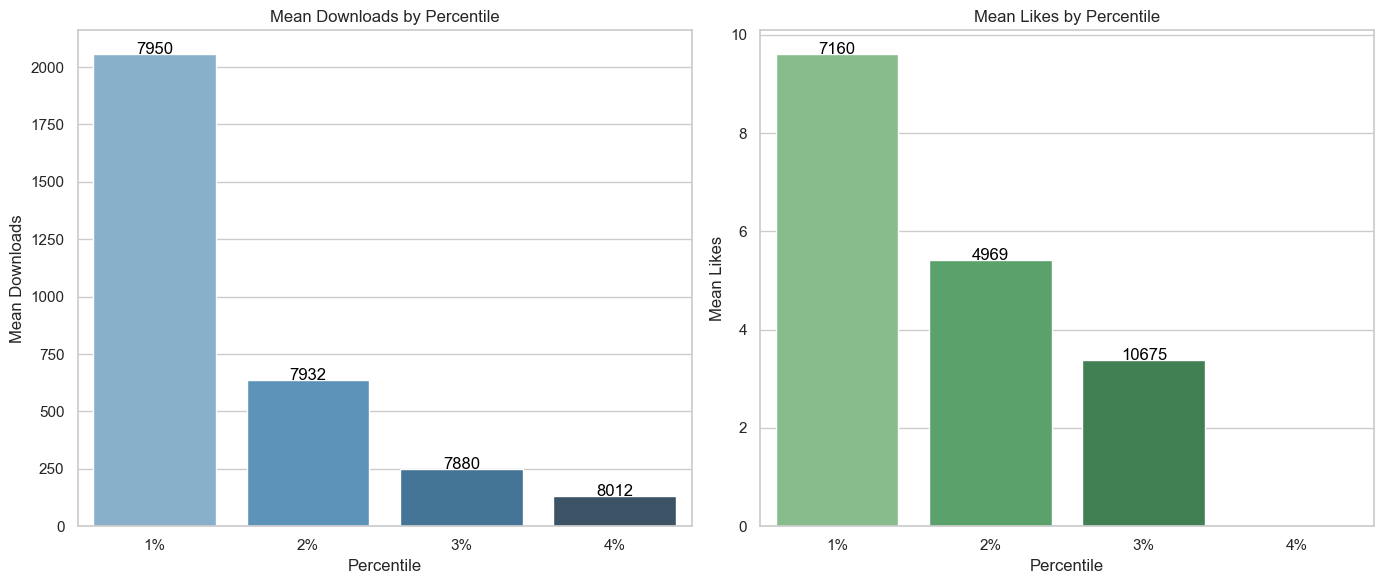

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting aesthetic parameters with seaborn
sns.set(style="whitegrid")

# Assuming df is your DataFrame and it has 'downloads' and 'likes' as columns of interest
# Extend percentiles to include 5th percentile
percentiles = [0.99, 0.98, 0.97, 0.96, 0.95]

# Prepare lists to store result DataFrames for downloads and likes
download_results_list = []
like_results_list = []

# Helper function to calculate metrics for a given DataFrame and feature
def calculate_metrics(data, feature, percentile):
    return {
        'Percentile': f'{int((1 - percentile) * 100)}%',
        'Mean': data[feature].mean(),
        'Standard Deviation': data[feature].std(),
        'Sum': data[feature].sum(),
        'Min': data[feature].min(),
        'Max': data[feature].max(),
        'Total Models': len(data)
    }

# Process each percentile for both 'downloads' and 'likes'
for i in range(len(percentiles)-1):
    # Downloads
    percentile_data_downloads = df[(df['downloads'] > df['downloads'].quantile(percentiles[i+1])) & (df['downloads'] <= df['downloads'].quantile(percentiles[i]))]
    download_results_list.append(calculate_metrics(percentile_data_downloads, 'downloads', percentiles[i]))

    # Likes
    percentile_data_likes = df[(df['likes'] > df['likes'].quantile(percentiles[i+1])) & (df['likes'] <= df['likes'].quantile(percentiles[i]))]
    like_results_list.append(calculate_metrics(percentile_data_likes, 'likes', percentiles[i]))

# Convert results lists to DataFrames
download_results = pd.DataFrame(download_results_list)
like_results = pd.DataFrame(like_results_list)

# Plotting
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Downloads plot
sns.barplot(x='Percentile', y='Mean', data=download_results, ax=ax[0], palette="Blues_d")
ax[0].set_title('Mean Downloads by Percentile')
ax[0].set_xlabel('Percentile')
ax[0].set_ylabel('Mean Downloads')
for index, row in download_results.iterrows():
    ax[0].text(index, row['Mean'], f'{row["Total Models"]}', color='black', ha="center")

# Likes plot
sns.barplot(x='Percentile', y='Mean', data=like_results, ax=ax[1], palette="Greens_d")
ax[1].set_title('Mean Likes by Percentile')
ax[1].set_xlabel('Percentile')
ax[1].set_ylabel('Mean Likes')
for index, row in like_results.iterrows():
    ax[1].text(index, row['Mean'], f'{row["Total Models"]}', color='black', ha="center")

plt.tight_layout()
plt.show()


### Analysis 2 

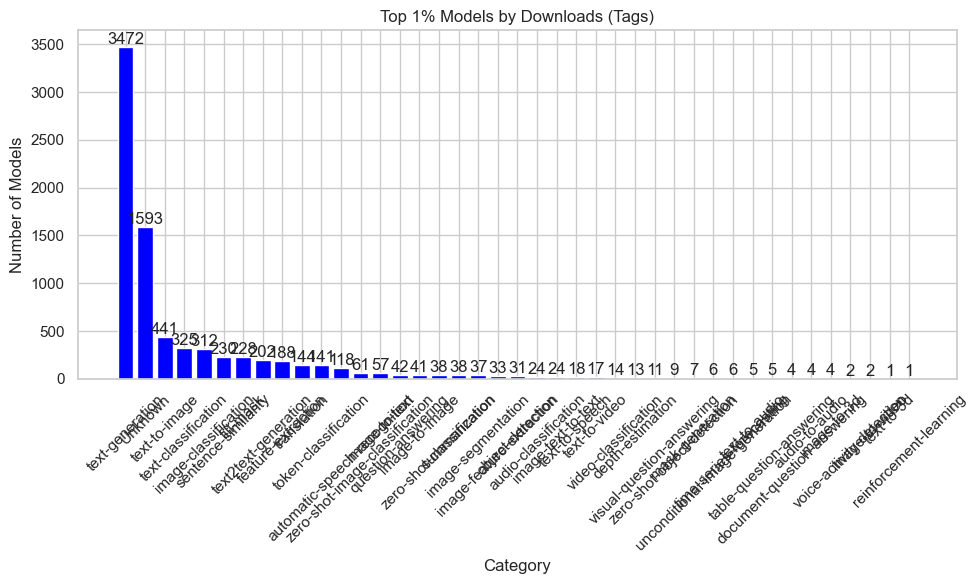

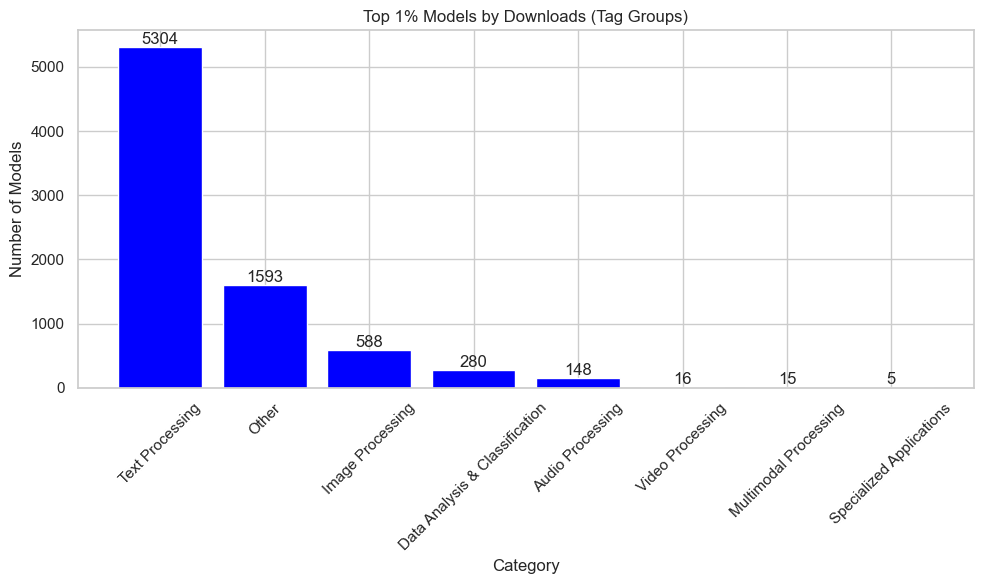

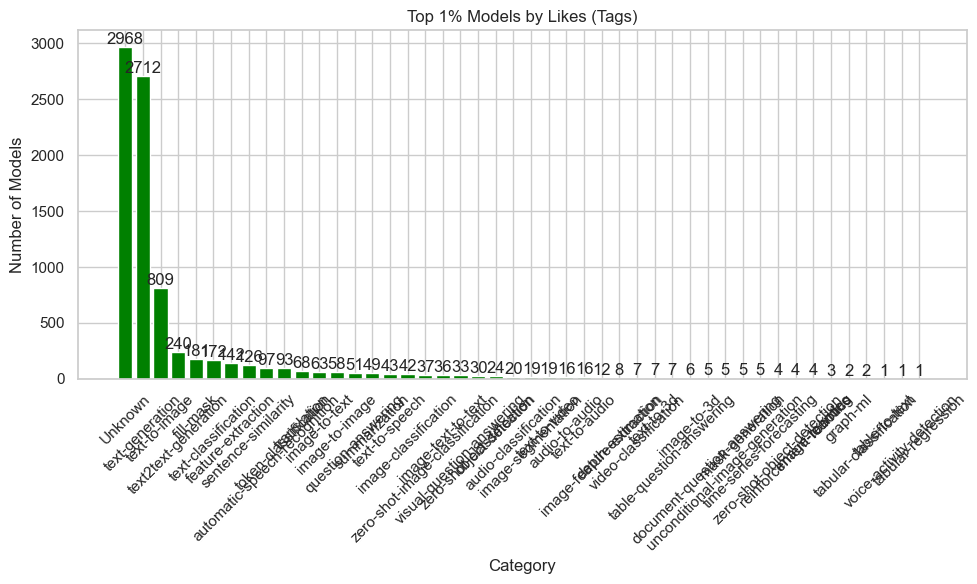

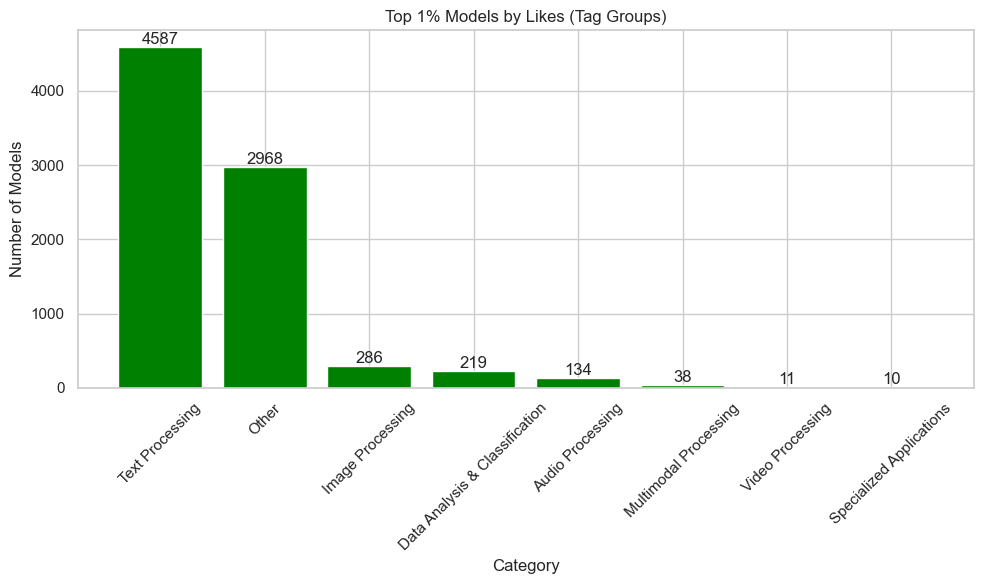

In [62]:
# Function to map tags to groups
def get_tag_group(tag):
    for group, tags in tag_groups.items():
        if tag in tags:
            return group
    return "Other"

# Add a 'Tag Group' column to the DataFrame
df['Tag Group'] = df['pipeline_tag'].apply(get_tag_group)

# Calculate the top 1% cutoff for downloads and likes
top_1_percent_cutoff_downloads = df['downloads'].quantile(0.99)
top_1_percent_cutoff_likes = df['likes'].quantile(0.99)

# Filter the DataFrame to include only the top 1% based on downloads and likes
top_1_percent_downloads = df[df['downloads'] >= top_1_percent_cutoff_downloads]
top_1_percent_likes = df[df['likes'] >= top_1_percent_cutoff_likes]

# Count occurrences for pipeline_tags and tag_groups
download_tag_counts = top_1_percent_downloads['pipeline_tag'].value_counts()
download_group_counts = top_1_percent_downloads['Tag Group'].value_counts()
like_tag_counts = top_1_percent_likes['pipeline_tag'].value_counts()
like_group_counts = top_1_percent_likes['Tag Group'].value_counts()

# Function to plot bar charts
def plot_counts(counts, title, color):
    plt.figure(figsize=(10, 6))
    bars = plt.bar(counts.index, counts.values, color=color)
    plt.xlabel('Category')
    plt.ylabel('Number of Models')
    plt.title(title)
    plt.xticks(rotation=45, ha='center')
    for bar in bars:
        yval = bar.get_height()
        plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')
    plt.tight_layout()
    plt.show()

# Plotting downloads by pipeline_tags and tag_groups
plot_counts(download_tag_counts, 'Top 1% Models by Downloads (Tags)', 'blue')
plot_counts(download_group_counts, 'Top 1% Models by Downloads (Tag Groups)', 'blue')

# Plotting likes by pipeline_tags and tag_groups
plot_counts(like_tag_counts, 'Top 1% Models by Likes (Tags)', 'green')
plot_counts(like_group_counts, 'Top 1% Models by Likes (Tag Groups)', 'green')


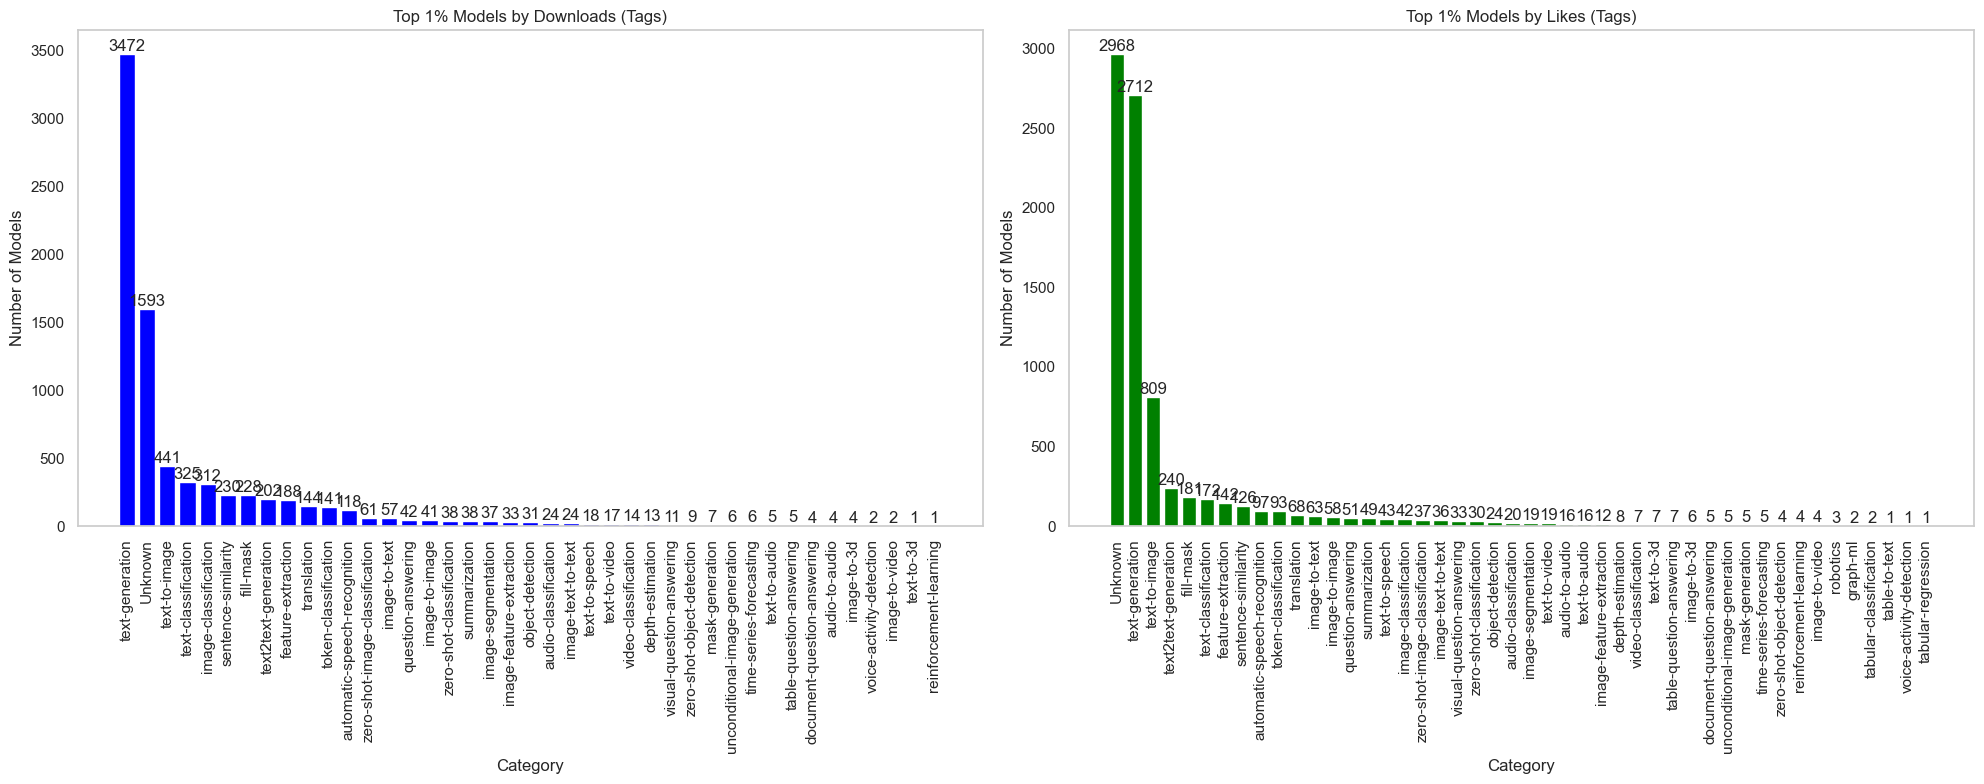

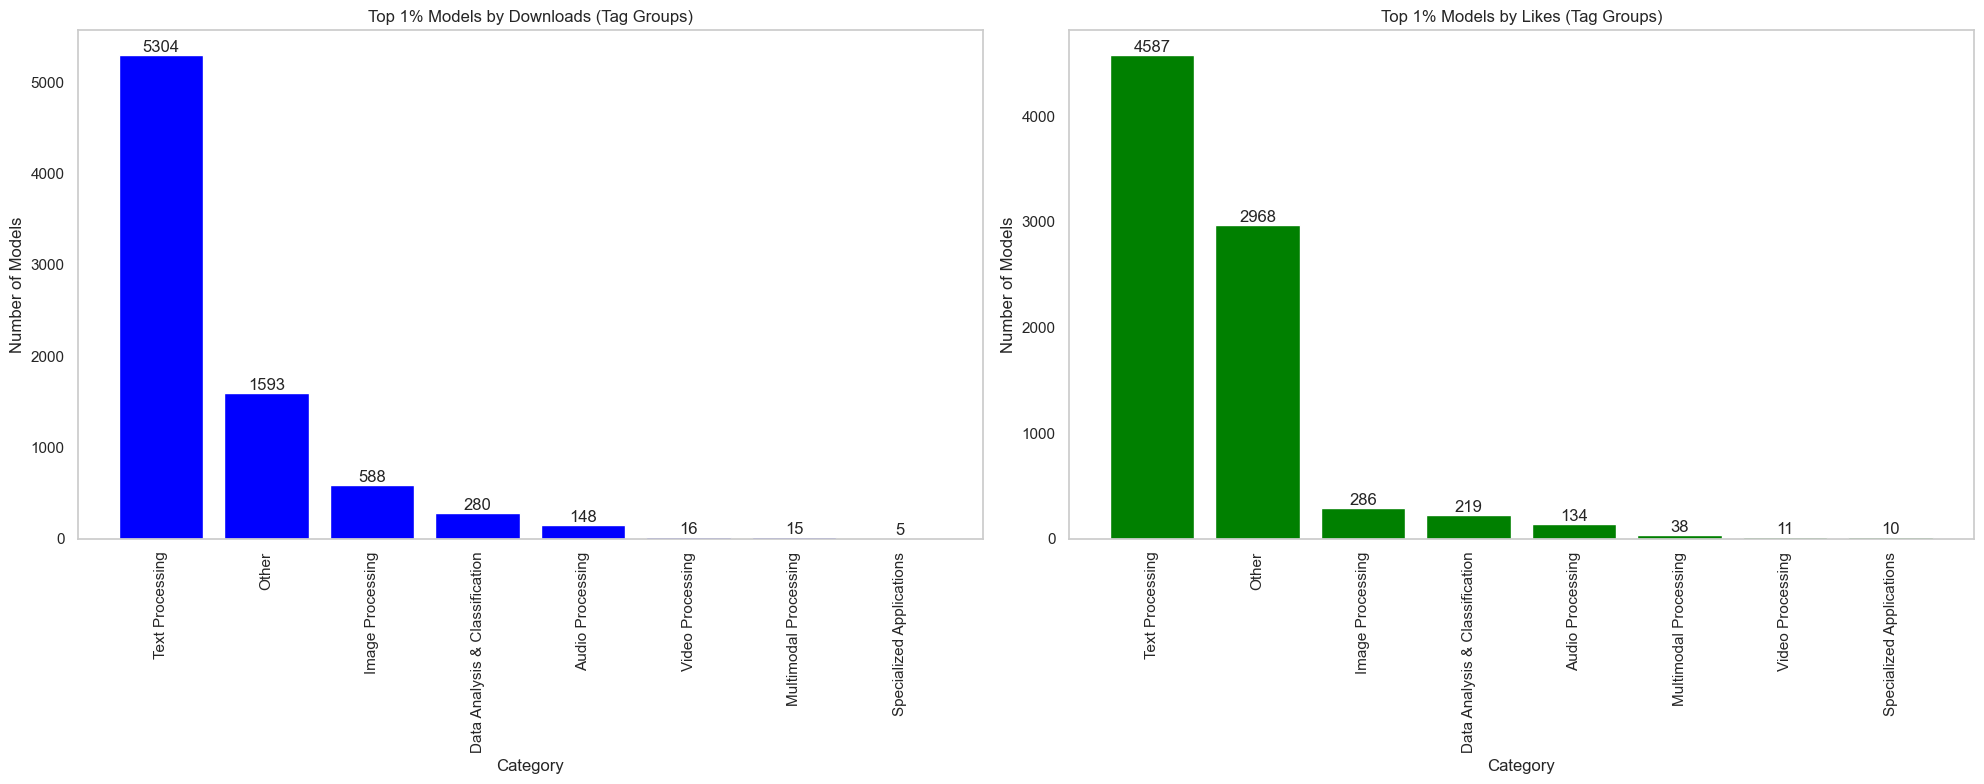

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns

# Setting seaborn style for better aesthetics
sns.set(style="whitegrid")

# Function to plot bar charts side by side for downloads and likes
def plot_side_by_side(counts_downloads, counts_likes, title_downloads, title_likes, color_downloads, color_likes):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))  # 1 row, 2 columns for side-by-side plots

    # Removing grid lines for cleaner look
    axs[0].grid(False)
    axs[1].grid(False)

    # Plot for downloads
    bars_downloads = axs[0].bar(counts_downloads.index, counts_downloads.values, color=color_downloads)
    axs[0].set_title(title_downloads)
    axs[0].set_xlabel('Category')
    axs[0].set_ylabel('Number of Models')
    axs[0].tick_params(axis='x', rotation=90)
    for bar in bars_downloads:
        yval = bar.get_height()
        axs[0].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

    # Plot for likes
    bars_likes = axs[1].bar(counts_likes.index, counts_likes.values, color=color_likes)
    axs[1].set_title(title_likes)
    axs[1].set_xlabel('Category')
    axs[1].set_ylabel('Number of Models')
    axs[1].tick_params(axis='x', rotation=90)
    for bar in bars_likes:
        yval = bar.get_height()
        axs[1].text(bar.get_x() + bar.get_width()/2, yval, int(yval), va='bottom', ha='center')

    plt.tight_layout()
    plt.show()

# Sample usage with dummy data (replace with your actual DataFrame columns)
# download_tag_counts = pd.Series(...)
# like_tag_counts = pd.Series(...)
# download_group_counts = pd.Series(...)
# like_group_counts = pd.Series(...)

# Plotting downloads and likes by pipeline_tags
plot_side_by_side(download_tag_counts, like_tag_counts, 'Top 1% Models by Downloads (Tags)', 'Top 1% Models by Likes (Tags)', 'blue', 'green')

# Plotting downloads and likes by tag_groups
plot_side_by_side(download_group_counts, like_group_counts, 'Top 1% Models by Downloads (Tag Groups)', 'Top 1% Models by Likes (Tag Groups)', 'blue', 'green')


### Newly requested information 

In [122]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting the seaborn style for better aesthetics
sns.set(style="whitegrid")

# Function to plot bar charts side by side for downloads and likes
def plot_side_by_side(counts_downloads, counts_likes, title_downloads, title_likes, color_downloads, color_likes):
    fig, axs = plt.subplots(1, 2, figsize=(20, 8))
    axs[0].grid(False)
    axs[1].grid(False)

    bars_downloads = axs[0].bar(counts_downloads.index, counts_downloads.values, color=color_downloads)
    axs[0].set_title(title_downloads)
    axs[0].set_xlabel('Category')
    axs[0].set_ylabel('Number of Models')
    axs[0].tick_params(axis='x', rotation=90)
    for bar in bars_downloads:
        axs[0].text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), va='bottom', ha='center')

    bars_likes = axs[1].bar(counts_likes.index, counts_likes.values, color=color_likes)
    axs[1].set_title(title_likes)
    axs[1].set_xlabel('Category')
    axs[1].set_ylabel('Number of Models')
    axs[1].tick_params(axis='x', rotation=90)
    for bar in bars_likes:
        axs[1].text(bar.get_x() + bar.get_width()/2, bar.get_height(), int(bar.get_height()), va='bottom', ha='center')

    plt.tight_layout()
    plt.show()

# 1. Identify the top three tasks within each 'Tag Group'
# Assuming 'Tag Group' and 'pipeline_tag' columns exist in df
grouped = df.groupby(['Tag Group', 'pipeline_tag']).size().reset_index(name='count')
top_tasks_per_group = grouped.groupby('Tag Group').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

# 2. Get a list of popular models for each top task within each Tag Group
popular_models_per_group = {}
for _, row in top_tasks_per_group.iterrows():
    group = row['Tag Group']
    task = row['pipeline_tag']
    # Filter the DataFrame for the specific group and task
    top_models = df[(df['Tag Group'] == group) & (df['pipeline_tag'] == task)]
    # Sort these models by 'downloads', select the top ones, assuming 'id' is a unique identifier for models
    popular_models = top_models.sort_values(by='downloads', ascending=False).head(3)
    # Store in the dictionary
    popular_models_per_group[(group, task)] = popular_models[['id', 'downloads', 'likes']]

# Print popular models by Tag Group and Task
for key, value in popular_models_per_group.items():
    group, task = key
    print(f"\nTag Group: {group}, Task: {task}")
    print(value)


/tmp/ipykernel_83608/3202601652.py:36: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  top_tasks_per_group = grouped.groupby('Tag Group').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)



Tag Group: Audio Processing, Task: automatic-speech-recognition
                                                     id  downloads  likes
20504     jonatasgrosman/wav2vec2-large-xlsr-53-english   40828570  419.0
20501      jonatasgrosman/wav2vec2-large-xlsr-53-arabic   12159880   18.0
20514  jonatasgrosman/wav2vec2-large-xlsr-53-portuguese    4703835   20.0

Tag Group: Audio Processing, Task: audio-to-audio
                                          id  downloads  likes
27151        speechbrain/mtl-mimic-voicebank      42008   33.0
27150   speechbrain/metricgan-plus-voicebank       8596   45.0
117623                 microsoft/speecht5_vc       7026   70.0

Tag Group: Audio Processing, Task: audio-classification
                                                      id  downloads  likes
82533            MIT/ast-finetuned-audioset-10-10-0.4593  279783992  154.0
33834  audeering/wav2vec2-large-robust-12-ft-emotion-...     314540   74.0
10562                    anton-l/wav2vec2-base-superb-

### Analysis 3

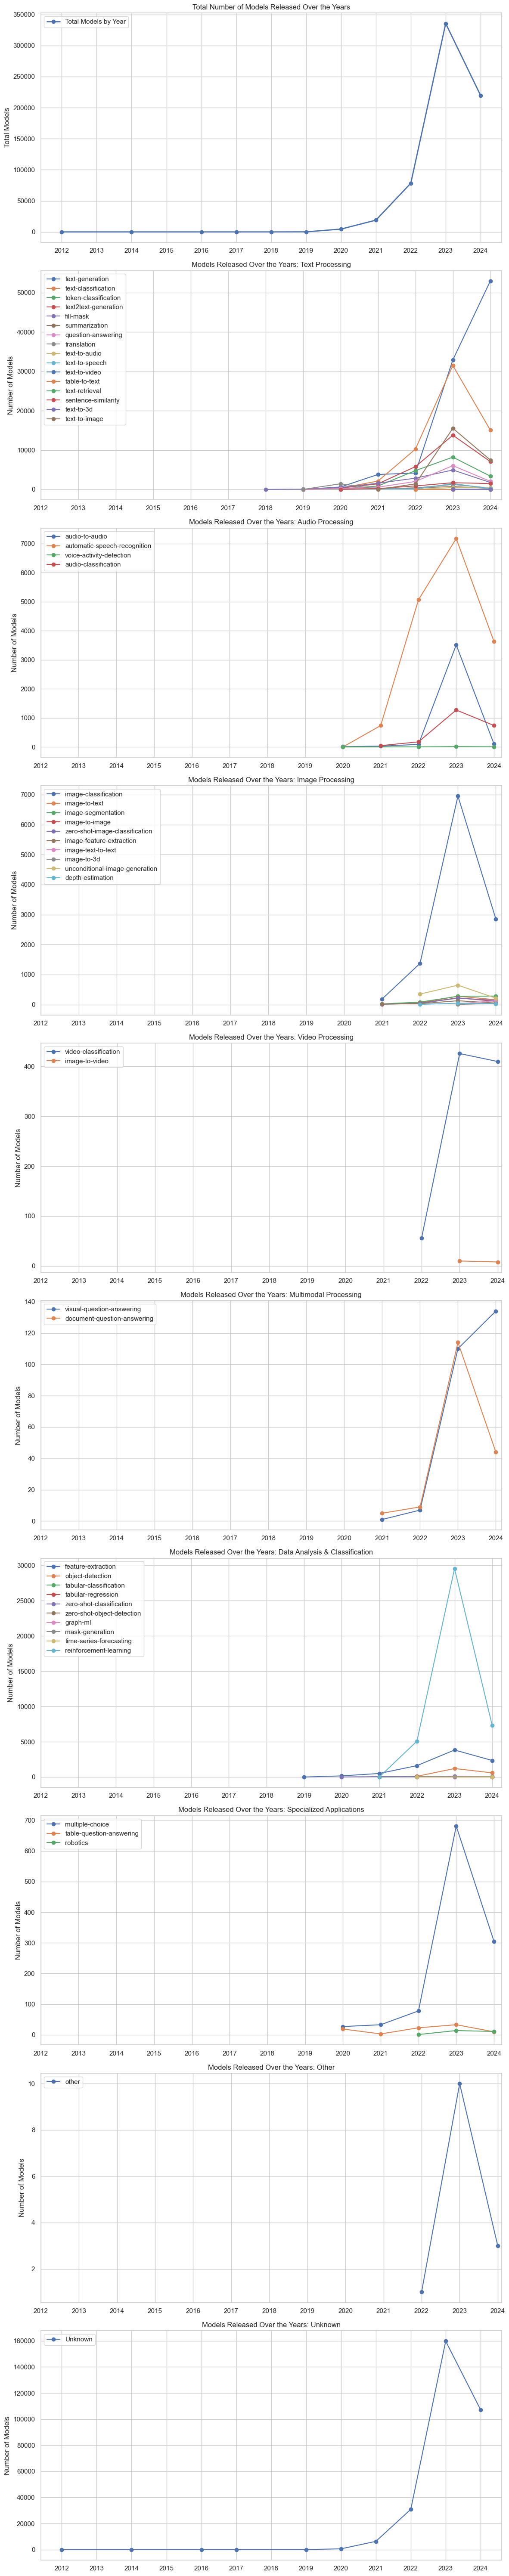

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Load and prepare the DataFrame
# Assuming df is already loaded and includes 'earliest_commit_date' and 'pipeline_tag'

# Convert dates and extract the year
df['earliest_commit_date'] = pd.to_datetime(df['earliest_commit_date'], utc=True)
df['year'] = df['earliest_commit_date'].dt.year

# Calculate total models by year
total_models_by_year = df['year'].value_counts().sort_index()

# Group data by year and tag
model_count_by_year_tag = df.groupby(['year', 'pipeline_tag']).size().reset_index(name='count')

# Define tag groups

fig, axes = plt.subplots(nrows=len(tag_groups) + 1, figsize=(12, 6 * (len(tag_groups) + 1)), sharex=False)

# Plot total models
axes[0].plot(total_models_by_year.index, total_models_by_year.values, label='Total Models by Year', marker='o', color='b', linewidth=2)
axes[0].set_title('Total Number of Models Released Over the Years')
axes[0].set_ylabel('Total Models')
axes[0].set_xticks(np.arange(total_models_by_year.index.min(), total_models_by_year.index.max() + 1))
axes[0].legend()

# Plot each tag group
for ax, (group_name, tags) in zip(axes[1:], tag_groups.items()):
    data_present = False
    for tag in tags:
        tag_data = model_count_by_year_tag[model_count_by_year_tag['pipeline_tag'] == tag]
        if not tag_data.empty:
            ax.plot(tag_data['year'], tag_data['count'], label=tag, marker='o')
            data_present = True
    ax.set_xticks(np.arange(df['year'].min(), df['year'].max() + 1))
    ax.set_title(f'Models Released Over the Years: {group_name}')
    ax.set_ylabel('Number of Models')
    if data_present:
        ax.legend(loc='upper left')
    else:
        print(f"No data to plot for {group_name}")

plt.tight_layout()
plt.show()


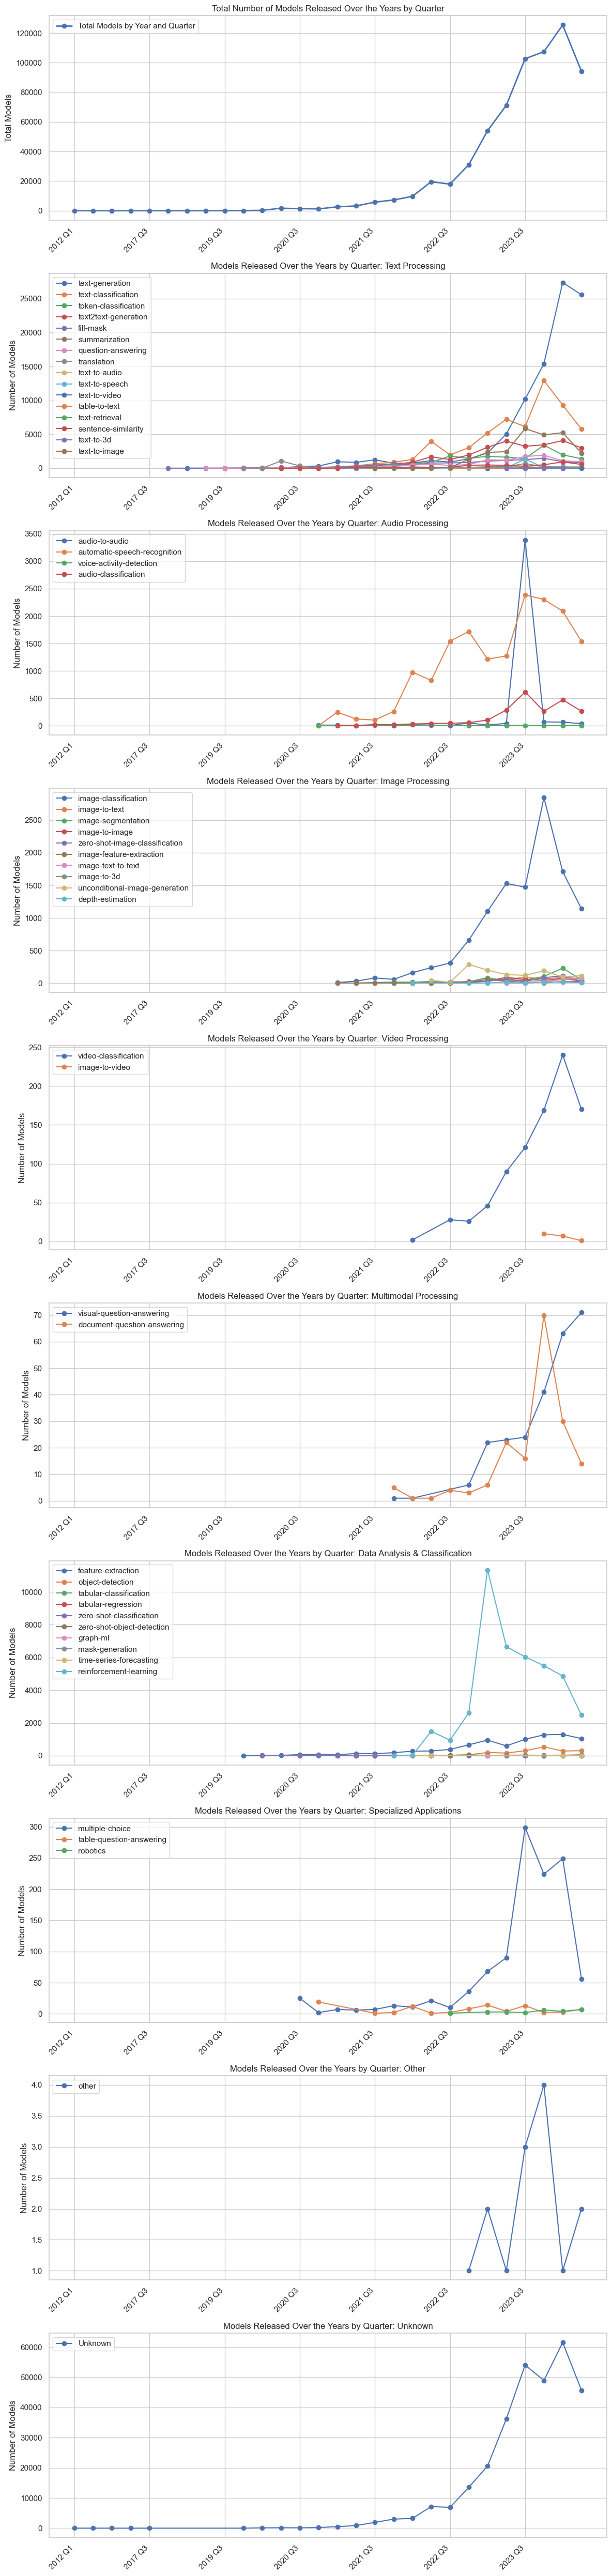

<Figure size 640x480 with 0 Axes>

In [106]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Assuming 'df' is your DataFrame with the necessary columns

# Convert dates and extract the year and quarter
df['earliest_commit_date'] = pd.to_datetime(df['earliest_commit_date'], utc=True)
df['year'] = df['earliest_commit_date'].dt.year
df['quarter'] = df['earliest_commit_date'].dt.quarter

# Remove any rows where the year or quarter might be NaN
df = df.dropna(subset=['year', 'quarter'])

# Combine year and quarter into a single string column for easier plotting
df['year_quarter'] = df['year'].astype(int).astype(str) + ' Q' + df['quarter'].astype(int).astype(str)

# Calculate total models by year and quarter
total_models_by_year_quarter = df.groupby('year_quarter').size().sort_index()

# Group data by year_quarter and tag
model_count_by_year_quarter_tag = df.groupby(['year_quarter', 'pipeline_tag']).size().reset_index(name='count')

# Create the plotting area with appropriate sizing
fig, axes = plt.subplots(nrows=len(tag_groups) + 1, figsize=(12, 5 * (len(tag_groups) + 1)), sharex=True)

# Plot total models by year and quarter
axes[0].plot(total_models_by_year_quarter.index, total_models_by_year_quarter, label='Total Models by Year and Quarter', marker='o', color='b', linewidth=2)
axes[0].set_title('Total Number of Models Released Over the Years by Quarter')
axes[0].set_ylabel('Total Models')
axes[0].legend()

# Set x-ticks and labels with enhanced visibility
xticks = total_models_by_year_quarter.index[::4]  # Adjust this depending on the density of your data
for ax in axes:
    ax.set_xticks(xticks)
    ax.set_xticklabels(xticks, rotation=45, ha='right')
    ax.xaxis.set_tick_params(which='both', labelbottom=True)  # Ensure labels are not turned off

# Plot for each tag group
for ax, (group_name, tags) in zip(axes[1:], tag_groups.items()):
    for tag in tags:
        tag_data = model_count_by_year_quarter_tag[model_count_by_year_quarter_tag['pipeline_tag'] == tag]
        if not tag_data.empty:
            ax.plot(tag_data['year_quarter'], tag_data['count'], label=tag, marker='o')
    ax.set_title(f'Models Released Over the Years by Quarter: {group_name}')
    ax.set_ylabel('Number of Models')
    ax.legend(loc='upper left')

# Add disclaimers at the bottom of the plot
  
plt.tight_layout()
plt.show()
plt.savefig('models_over_quarters.png')  # Adjust filename and settings as needed
